# LDL decomposition

LDL decomposition is very similar to [Cholesky factorization](https://hatefdastour.github.io/notes/Numerical_Analysis/NLA_Cholesky_factorization.html); however, there are some subtle differences. In this decomposition, a (real) symmetric positive definite matrix $A$ is decomposed as follows

\begin{align*}A =LDL^{*},\end{align*}

where $L$ is a lower triangular matrix, and $D$ is a diagonal matrix.


Furthermore, We have,

\begin{align*}
\begin{bmatrix}a_{11} & a_{12} & \dots & a_{1n} \\ a_{21} & a_{22} & \dots & a_{2n} \\
\vdots & \vdots &   & \vdots \\ a_{n1} & a_{n2} & \dots & a_{nn} \end{bmatrix}=
\begin{bmatrix}1 & 0 & \dots & 0 \\ l_{21} & 1 & \dots & 0 \\
\vdots & \vdots &   & \vdots \\ l_{n1} & l_{n2} & \dots & 1 \end{bmatrix}
\begin{bmatrix}d_{11} & 0 & \dots & 0 \\ 0 & d_{22} & \dots & 0 \\
\vdots & \vdots &   & \vdots \\ 0 & 0 & \dots & d_{nn} \end{bmatrix}.
\end{align*}
Solving this system, $l_{ij}$ and $d_{ii}$ can be identified as follows

\begin{align*}
d_{ii} &= a_{ii} - \sum_{k=1}^{i-1} l_{ij}^{2}d_{jj},\\
l_{ii} &= \frac{1}{d_{ii}}\left( a_{ij} - \sum_{k=1}^{i-1} l_{ik} l_{jk} d_{kk}\right),\\
\end{align*}
See [1] for the full derivation of this algorithm.

::::{tab-set}

:::{tab-item} Python Code
```python
import numpy as np
import pandas as pd

def myLDL(A):
    '''
    Assuming that the matrix A is symmetric and positive definite,
    this function computes a unit lower triangular matrix L, and
    a diagonal matrix D, such that A = LDL^t
    Parameters
    ----------
    A : numpy array
        DESCRIPTION. Matrix A

    Returns
    -------
    L : numpy array
        DESCRIPTION. Matrix L from A = LDL^t
    D : numpy array
        DESCRIPTION. Matrix L from A = LDL^t

    '''
    
    n = A.shape[0]
    U = np.zeros([n,n], dtype = float)
    U[0, 0] = A[0, 0]
    U[1:, 0] = A[1:, 0]/U[0, 0]
    for j in range(1, n):
        U[j, j] = A[j, j]
        for k in range(0, j):
            U[j, j] = U[j, j] - U[k, k]*U[j, k]*U[j, k]
        for i in range(j+1, n):
            U[i, j] = A[i, j]
            for k in range(0, j):
                U[i, j] = U[i, j]- U[k, k]*U[i, k]*U[j, k]
            U[i, j] = U[i, j]/U[j, j]
    L = np.tril(U,-1) + np.eye(n, dtype=float)
    D = np.diag(np.diag(U))
    return L, D
```
:::

:::{tab-item} MATLAB Code
```MATLAB
function [L, D] = myLDL(A)
%{
Assuming that the matrix A is symmetric and positive definite,
this function computes a unit lower triangular matrix L, and
a diagonal matrix D, such that A = LDL^t
Parameters
----------
L : numpy array
    DESCRIPTION. Matrix L from A = LDL^t
D : numpy array
    DESCRIPTION. Matrix L from A = LDL^t
%}
n=length(A);
U = zeros(n,n);
U(1,1)=A(1,1);
U(2:n,1)=A(2:n,1)/U(1,1);
for j=2:n
   U(j,j)= A(j,j);
   for k=1:j-1
       U(j,j)=U(j,j)-U(k,k)*U(j,k)*U(j,k);
   end
   for i=j+1:n
       U(i,j)=A(i,j);
       for k=1:j-1
           U(i,j)=U(i,j)-U(k,k)*U(i,k)*U(j,k);
       end
       U(i,j)=U(i,j)/U(j,j);
   end
%
end
L = tril(U,-1)+eye(n,n);
D = diag(diag(U));
```
:::

::::

In [1]:
import sys
sys.path.insert(0,'..')
import hd_tools as hd

Loading BokehJS ...

<font color='Blue'><b>Example</b></font>: Apply LDL decomposition on the following matrix and identify $L$, $D$, and $L$.
\begin{align*}A = \left[\begin{array}{cccc} 7 & 3 & -1 & 2\\ 3 & 8 & 1 & -4\\ -1 & 1 & 4 & -1\\ 2 & -4 & -1 & 6 \end{array}\right].\end{align*}

<font color='Green'><b>Solution</b></font>: We have,

In [2]:
import numpy as np
from hd_Matrix_Decomposition import myLDL
from IPython.display import display, Latex
from sympy import init_session, init_printing, Matrix

A = np.array([ [7, 3, -1, 2], [3, 8, 1, -4], [-1, 1, 4, -1], [2, -4, -1, 6] ])
L, D = myLDL(A)
display(Latex(r'L ='), Matrix(np.round(L, 2)))
display(Latex(r'D ='), Matrix(np.round(D, 2)))
display(Latex(r'LD L^T ='), Matrix(np.round(np.matmul(L,np.matmul(D,L.T)), 2)))

<IPython.core.display.Latex object>

Matrix([
[  1.0,     0,    0,   0],
[ 0.43,   1.0,    0,   0],
[-0.14,  0.21,  1.0,   0],
[ 0.29, -0.72, 0.09, 1.0]])

<IPython.core.display.Latex object>

Matrix([
[7.0,    0,    0,    0],
[  0, 6.71,    0,    0],
[  0,    0, 3.55,    0],
[  0,    0,    0, 1.89]])

<IPython.core.display.Latex object>

Matrix([
[ 7.0,  3.0, -1.0,  2.0],
[ 3.0,  8.0,  1.0, -4.0],
[-1.0,  1.0,  4.0, -1.0],
[ 2.0, -4.0, -1.0,  6.0]])

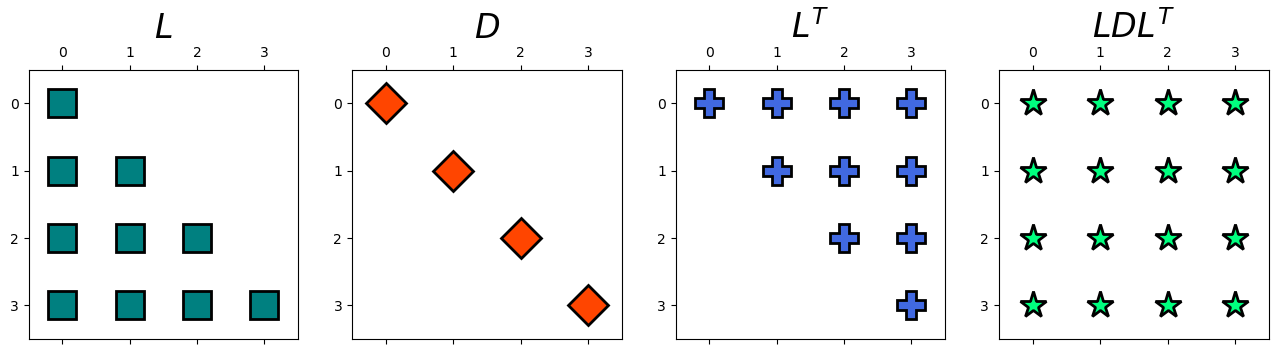

In [12]:
hd.matrix_decomp_fig(mats = [L, D, L.T, np.round(np.matmul(L,np.matmul(D,L.T)), 2)],
                     labels = ['$L$', '$D$','$L^T$', '$LD L^T$'], nrows=1, ncols=4, figsize=(16, 6))

Note that we could get a similar results using function, [```scipy.linalg.ldl```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.ldl.html).

In [4]:
import scipy.linalg as linalg
L, D, P = linalg.ldl(A)
display(Latex(r'L ='), Matrix(np.round(L, 2)))
display(Latex(r'D ='), Matrix(np.round(D, 2)))

<IPython.core.display.Latex object>

Matrix([
[  1.0,     0,    0,   0],
[ 0.43,   1.0,    0,   0],
[-0.14,  0.21,  1.0,   0],
[ 0.29, -0.72, 0.09, 1.0]])

<IPython.core.display.Latex object>

Matrix([
[7.0,    0,    0,    0],
[  0, 6.71,    0,    0],
[  0,    0, 3.55,    0],
[  0,    0,    0, 1.89]])

### Solving Linear systems using LDL decomposition

We can solve the linear system $Ax=b$ for $x$ using LDL decomposition. To demonstrate this, we use the following example,

<font color='Blue'><b>Example</b></font>:
Solve the following linear system using LDL decomposition.
\begin{align*}
\begin{cases}
7\,x_{1}+3\,x_{2}-x_{3}+2\,x_{4}=18\\ 3\,x_{1}+8\,x_{2}+x_{3}-4\,x_{4}=6\\ x_{2}-x_{1}+4\,x_{3}-x_{4}=9\\ 2\,x_{1}-4\,x_{2}-x_{3}+6\,x_{4}=15
\end{cases}
\end{align*}

<font color='Green'><b>Solution</b></font>:

Let $A=\left[\begin{array}{cccc} 7 & 3 & -1 & 2\\ 3 & 8 & 1 & -4\\ -1 & 1 & 4 & -1\\ 2 & -4 & -1 & 6 \end{array}\right]$
and $b=\left[\begin{array}{c} 18\\ 6\\ 9\\ 15 \end{array}\right]$.
Then, this linear system can be also expressed as follows,
\begin{align*}
Ax=(LDL^T)x=L(D(L^Tx))=b.
\end{align*}
We have,

In [13]:
A = np.array([ [7, 3, -1, 2], [3, 8, 1, -4], [-1, 1, 4, -1], [2, -4, -1, 6] ])
b = np.array([[18],[ 6],[ 9],[15]])
L, D = myLDL(A)
display(Latex(r'L ='), Matrix(np.round(L, 2)))
display(Latex(r'D ='), Matrix(np.round(D, 2)))

<IPython.core.display.Latex object>

Matrix([
[  1.0,     0,    0,   0],
[ 0.43,   1.0,    0,   0],
[-0.14,  0.21,  1.0,   0],
[ 0.29, -0.72, 0.09, 1.0]])

<IPython.core.display.Latex object>

Matrix([
[7.0,    0,    0,    0],
[  0, 6.71,    0,    0],
[  0,    0, 3.55,    0],
[  0,    0,    0, 1.89]])

Now we can solve the following linear systems instead
$$\begin{cases}
Lz = b,\\
Dy = z,\\
B^Tx=y.
\end{cases}$$

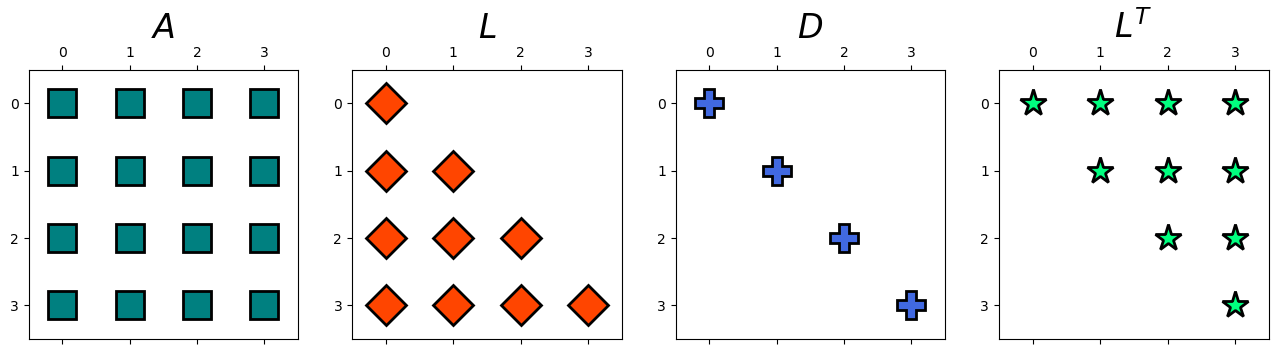

In [14]:
hd.matrix_decomp_fig(mats = [A, L, D, L.T], labels = ['$A$', '$L$', '$D$','$L^T$'], nrows=1, ncols=4, figsize=(16, 4))

In [15]:
# solving for z
z = np.linalg.solve(L, b)
display(Latex(r'z ='), Matrix(np.round(z, 2)))

<IPython.core.display.Latex object>

Matrix([
[ 18.0],
[-1.71],
[11.94],
[ 7.54]])

In [16]:
# solving y
y = np.linalg.solve(D, z)
display(Latex(r'y ='), Matrix(np.round(y, 2)))

<IPython.core.display.Latex object>

Matrix([
[ 2.57],
[-0.26],
[ 3.36],
[  4.0]])

In [17]:
# solving for x
x = np.linalg.solve(L.T, y)
display(Latex(r'x ='), Matrix(np.round(x, 2)))

<IPython.core.display.Latex object>

Matrix([
[1.0],
[2.0],
[3.0],
[4.0]])

Let's now solve the linear system directly and compare the results.

In [19]:
x_new = linalg.solve(A, b)
display(Latex(r'x ='), Matrix(np.round(x_new, 2)))

<IPython.core.display.Latex object>

Matrix([
[1.0],
[2.0],
[3.0],
[4.0]])

***
**References:**
1. Allaire, Grégoire, et al. Numerical linear algebra. Vol. 55. New York: Springer, 2008.
1. Burden, Richard L., and J. Douglas Faires. "Numerical analysis 8th ed." Thomson Brooks/Cole (2005).
1. Atkinson, Kendall E. An introduction to numerical analysis. John wiley & sons, 2008.
1. Khoury, Richard, and Douglas Wilhelm Harder. Numerical methods and modelling for engineering. Springer, 2016.
***